In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("titanic7.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
a=data["Survived"]

In [5]:
data.drop("Survived",axis=1,inplace=True)

In [6]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
data["Survived"]=a

In [8]:
data.shape

(891, 12)

In [9]:
data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [10]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

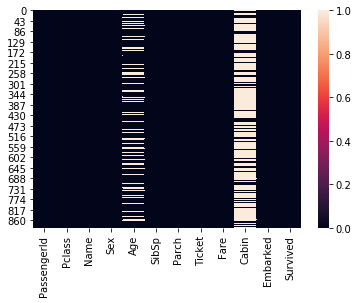

In [11]:
sns.heatmap(data.isnull())

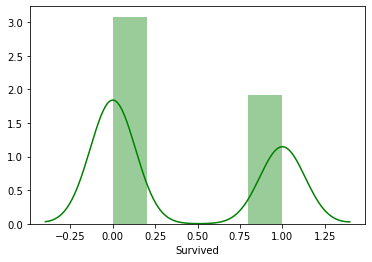

In [12]:
sns.distplot(data["Survived"],color="g")

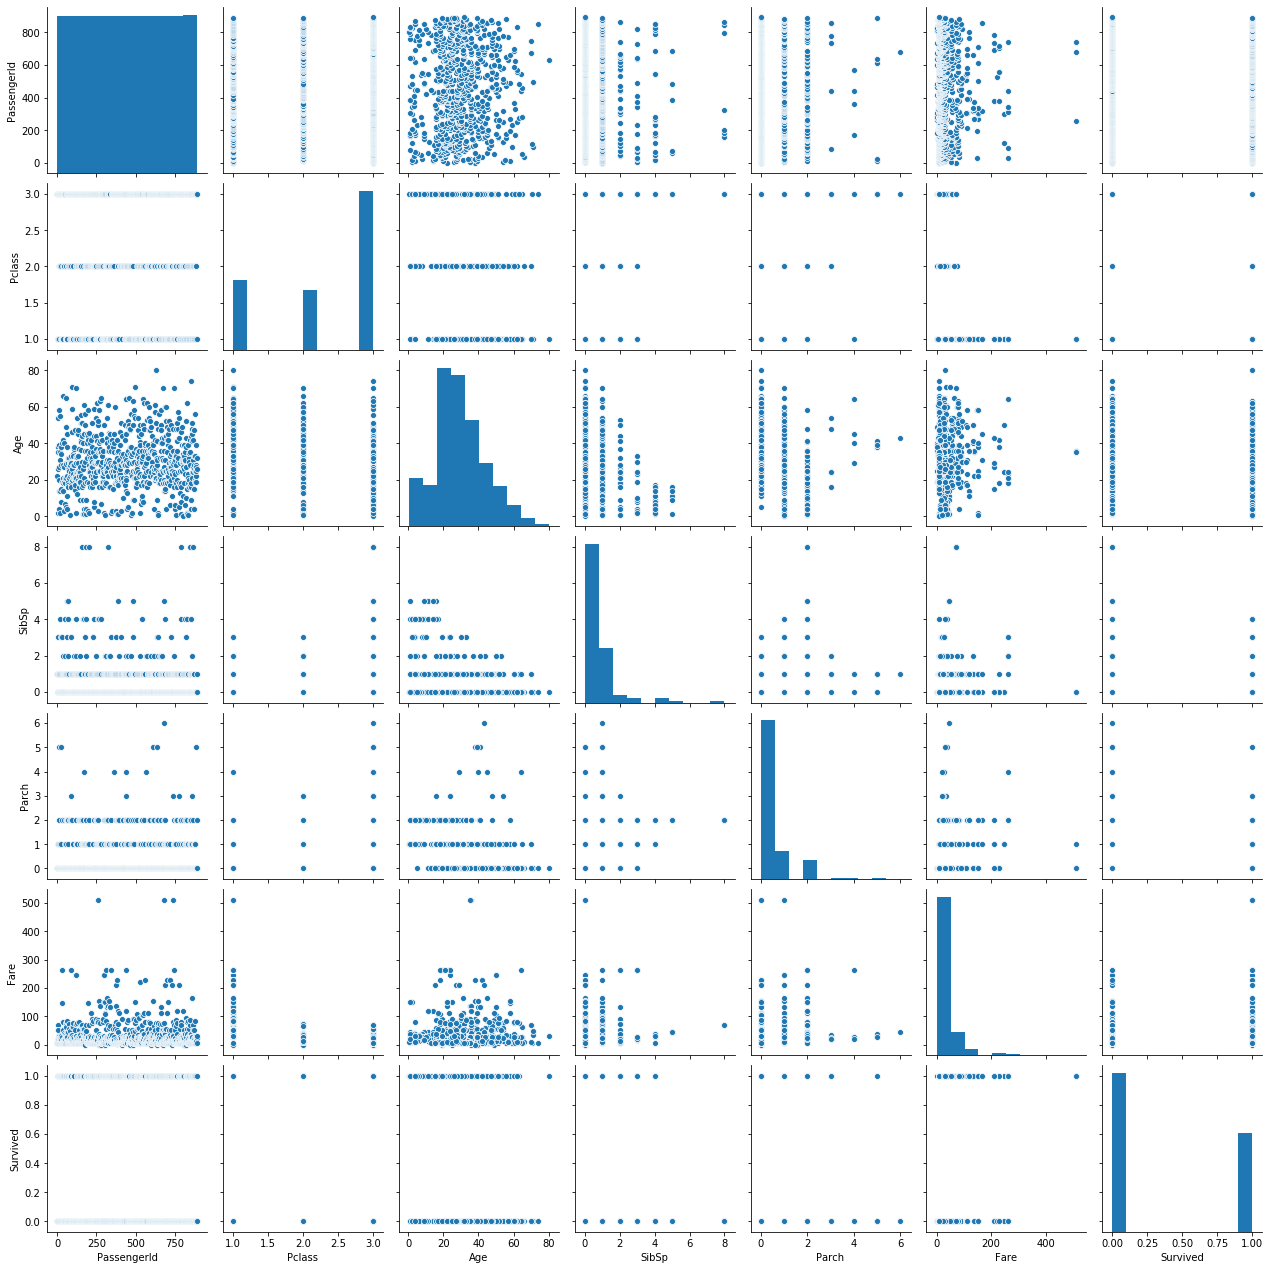

In [13]:
sns.pairplot(data)

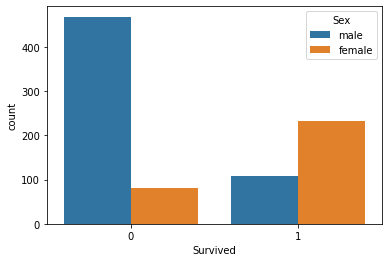

In [14]:
sns.countplot(x="Survived",data=data,hue="Sex")

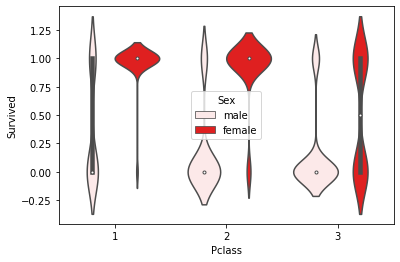

In [15]:
sns.violinplot(x="Pclass",y="Survived",hue="Sex",data=data,color="r")

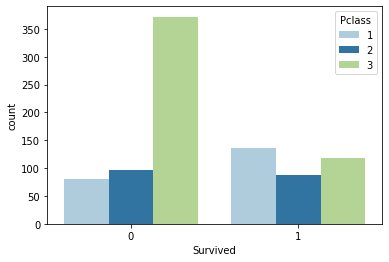

In [16]:
sns.countplot(x="Survived",hue="Pclass",data=data,palette="Paired")

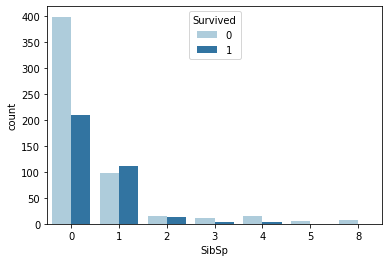

In [17]:
sns.countplot(x="SibSp",data=data,palette="Paired",hue="Survived")

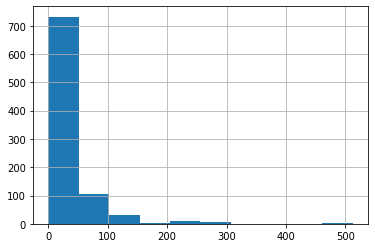

In [18]:
data["Fare"].hist()

PassengerId        AxesSubplot(0.125,0.71587;0.227941x0.16413)
Pclass          AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Age             AxesSubplot(0.672059,0.71587;0.227941x0.16413)
SibSp             AxesSubplot(0.125,0.518913;0.227941x0.16413)
Parch          AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Fare           AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Survived          AxesSubplot(0.125,0.321957;0.227941x0.16413)
dtype: object

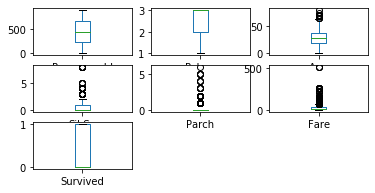

In [19]:
data.plot(kind="box",subplots=True,layout=(4,3))

In [20]:
import sklearn

In [21]:
from sklearn.impute import SimpleImputer
mp = SimpleImputer(missing_values=np.nan, strategy='mean')
data["Age"]=mp.fit_transform(data["Age"].values.reshape(-1,1))

In [22]:
mp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data["Cabin"]=mp.fit_transform(data["Cabin"].values.reshape(-1,1))

In [23]:
mp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data["Embarked"]=mp.fit_transform(data["Embarked"].values.reshape(-1,1))

In [24]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


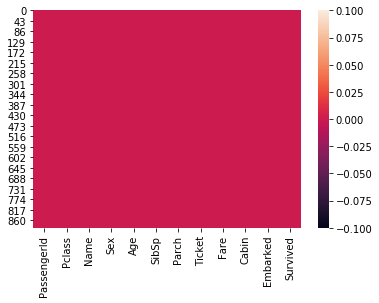

In [25]:
sns.heatmap(data.isnull())

In [26]:
list2=["Sex","Cabin","Embarked"]
from sklearn.preprocessing import LabelEncoder

oe=LabelEncoder()

for val in list2:
    data[val]=oe.fit_transform(data[val].astype(str))

In [27]:
data.drop("Embarked",axis=1,inplace=True)

In [28]:
data.drop("Name",axis=1,inplace=True)

In [29]:
data.drop("Ticket",axis=1,inplace=True)

In [30]:
data.drop("Cabin",axis=1,inplace=True)

In [31]:
data.drop("PassengerId",axis=1,inplace=True)

In [32]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.000000,1,0,7.2500,0
1,1,0,38.000000,1,0,71.2833,1
2,3,0,26.000000,0,0,7.9250,1
3,1,0,35.000000,1,0,53.1000,1
4,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0
887,1,0,19.000000,0,0,30.0000,1
888,3,0,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [33]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.82737724, 0.73769513, 0.5924806 , ..., 0.47367361, 0.50244517,
        0.78927234],
       [1.56610693, 1.35557354, 0.63878901, ..., 0.47367361, 0.78684529,
        1.2669898 ],
       [0.82737724, 1.35557354, 0.2846632 , ..., 0.47367361, 0.48885426,
        1.2669898 ],
       ...,
       [0.82737724, 1.35557354, 0.        , ..., 2.00893337, 0.17626324,
        0.78927234],
       [1.56610693, 0.73769513, 0.2846632 , ..., 0.47367361, 0.04438104,
        1.2669898 ],
       [0.82737724, 0.73769513, 0.17706291, ..., 0.47367361, 0.49237783,
        0.78927234]])

In [34]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
       4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
       3, 3, 2, 4, 3, 4], dtype=int64))


In [35]:
data=data[((z<3).all(axis=1))]

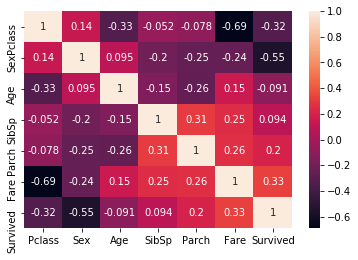

In [36]:
sns.heatmap(data.corr(),annot=True)

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
x=data.iloc[:,0:-1]

In [39]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [40]:
y=data.iloc[:,-1]

In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [43]:
  x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=0.22)

In [44]:
x_train.shape

(639, 6)

In [45]:
y_train.shape

(639,)

In [46]:
x_test.shape

(181, 6)

In [47]:
y_test.shape

(181,)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
model=[LogisticRegression(),DecisionTreeClassifier(),GaussianNB()]
for i in model:
    
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    p=i.predict(x_test)
    print("Accuracy score",accuracy_score(y_test,p))
    print("Confusion Matrix",confusion_matrix(y_test,p))
    print("Classifcation report",classification_report(y_test,p))

Accuracy score 0.8121546961325967
Confusion Matrix [[96  9]
 [25 51]]
Classifcation report               precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.85      0.67      0.75        76

    accuracy                           0.81       181
   macro avg       0.82      0.79      0.80       181
weighted avg       0.82      0.81      0.81       181

Accuracy score 0.7679558011049724
Confusion Matrix [[87 18]
 [24 52]]
Classifcation report               precision    recall  f1-score   support

           0       0.78      0.83      0.81       105
           1       0.74      0.68      0.71        76

    accuracy                           0.77       181
   macro avg       0.76      0.76      0.76       181
weighted avg       0.77      0.77      0.77       181

Accuracy score 0.8287292817679558
Confusion Matrix [[97  8]
 [23 53]]
Classifcation report               precision    recall  f1-score   support

           0      

In [50]:
def f(u):
    c3=SVC(kernel=u)
    c3.fit(x_train,y_train)
    p4=c3.predict(x_test)
    print(accuracy_score(y_test,p4))
    print(confusion_matrix(y_test,p4))
    print(classification_report(y_test,p4))

In [51]:
f("poly")

0.8397790055248618
[[97  8]
 [21 55]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.72      0.79        76

    accuracy                           0.84       181
   macro avg       0.85      0.82      0.83       181
weighted avg       0.84      0.84      0.84       181



In [52]:
f("linear")

0.8176795580110497
[[96  9]
 [24 52]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       105
           1       0.85      0.68      0.76        76

    accuracy                           0.82       181
   macro avg       0.83      0.80      0.81       181
weighted avg       0.82      0.82      0.81       181



In [53]:
f("rbf")

0.8453038674033149
[[98  7]
 [21 55]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       105
           1       0.89      0.72      0.80        76

    accuracy                           0.85       181
   macro avg       0.86      0.83      0.84       181
weighted avg       0.85      0.85      0.84       181



In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [55]:
rf.fit(x_test,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [56]:
predrf=rf.predict(x_test)

In [57]:
accuracy_score(y_test,predrf)

1.0

In [58]:
confusion_matrix(y_test,predrf)

array([[105,   0],
       [  0,  76]], dtype=int64)

In [59]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        76

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



In [60]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

In [61]:
ypredprob=rf.predict_proba(x_test)[:,1]

In [62]:
ypredprob

array([0.18, 1.  , 0.28, 0.  , 0.27, 0.  , 0.1 , 1.  , 0.12, 0.94, 0.03,
       0.  , 0.69, 0.11, 0.05, 0.  , 0.05, 0.03, 0.89, 0.02, 0.1 , 0.07,
       1.  , 0.05, 0.99, 0.85, 0.  , 0.02, 0.22, 1.  , 1.  , 0.99, 0.97,
       0.06, 0.99, 0.99, 0.65, 0.69, 0.64, 0.01, 0.02, 0.92, 0.03, 0.02,
       0.02, 0.24, 0.  , 0.25, 0.62, 0.01, 0.02, 0.01, 0.84, 1.  , 0.04,
       0.02, 0.15, 0.  , 0.96, 0.11, 0.87, 0.  , 1.  , 0.12, 0.85, 0.82,
       0.02, 0.65, 0.05, 0.17, 0.14, 1.  , 0.99, 0.05, 0.02, 0.83, 0.01,
       0.02, 0.99, 0.92, 0.89, 0.12, 0.92, 0.08, 0.63, 0.62, 0.78, 0.96,
       0.11, 0.08, 0.  , 1.  , 0.85, 0.06, 0.79, 0.16, 0.33, 0.05, 0.  ,
       0.01, 0.09, 0.  , 0.72, 0.66, 0.01, 0.09, 0.91, 0.65, 0.91, 0.06,
       0.71, 0.96, 0.01, 0.99, 0.92, 0.99, 0.75, 0.17, 0.13, 1.  , 0.05,
       0.95, 0.  , 0.  , 0.02, 0.95, 0.01, 0.99, 0.  , 0.92, 0.05, 0.92,
       0.01, 0.98, 0.93, 0.14, 0.01, 0.86, 0.01, 0.01, 0.91, 0.04, 1.  ,
       0.24, 0.34, 0.07, 0.76, 0.01, 0.01, 0.15, 0.

In [63]:
fpr,tpr,thresholds=roc_curve(y_test,ypredprob)

In [64]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03809524,
       0.05714286, 0.08571429, 0.0952381 , 0.11428571, 0.12380952,
       0.16190476, 0.17142857, 0.20952381, 0.21904762, 0.27619048,
       0.2952381 , 0.40952381, 0.5047619 , 0.52380952, 0.55238095,
       0.67619048, 1.        ])

In [65]:
tpr

array([0.        , 0.17105263, 0.31578947, 0.34210526, 0.39473684,
       0.46052632, 0.48684211, 0.5       , 0.59210526, 0.63157895,
       0.68421053, 0.69736842, 0.73684211, 0.86842105, 0.89473684,
       0.90789474, 0.94736842, 0.97368421, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

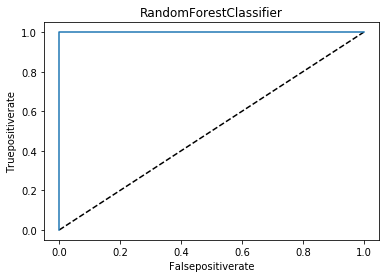

In [66]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("Falsepositiverate")
plt.ylabel("Truepositiverate")
plt.title("RandomForestClassifier")
plt.show()

In [67]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [68]:
auc_score

1.0